In [1]:
from stats import *
import matplotlib.pyplot as plt ; plt.rcParams["figure.figsize"] = (30,15)
import seaborn as sns
import statsmodels.formula.api as sm

## Setting up the Data

In [2]:
data = pd.read_stata(os.getcwd() + '/data/Mroz.dta').dropna()
data = data[data.lfp == 'In labor force'].reset_index(drop=True)
data

,k5,k618,age,lwg,inc,lfp,wc,hc
0,1,0,32,1.210165,10.910001,In labor force,Wife did not attend college,0
1,0,2,30,0.328504,19.500000,In labor force,Wife did not attend college,0
2,1,3,35,1.514128,12.039999,In labor force,Wife did not attend college,0
3,0,3,34,0.092115,6.800000,In labor force,Wife did not attend college,0
4,1,2,31,1.524280,20.100000,In labor force,Wife attended college,0
...,...,...,...,...,...,...,...,...
423,0,5,36,0.838011,18.200001,In labor force,Wife did not attend college,0
424,0,1,40,1.668861,22.641001,In labor force,Wife did not attend college,0
425,0,2,43,1.769435,21.640001,In labor force,Wife attended college,0
426,0,1,33,1.226446,24.000000,In labor force,Wife did not attend college,0


### A:

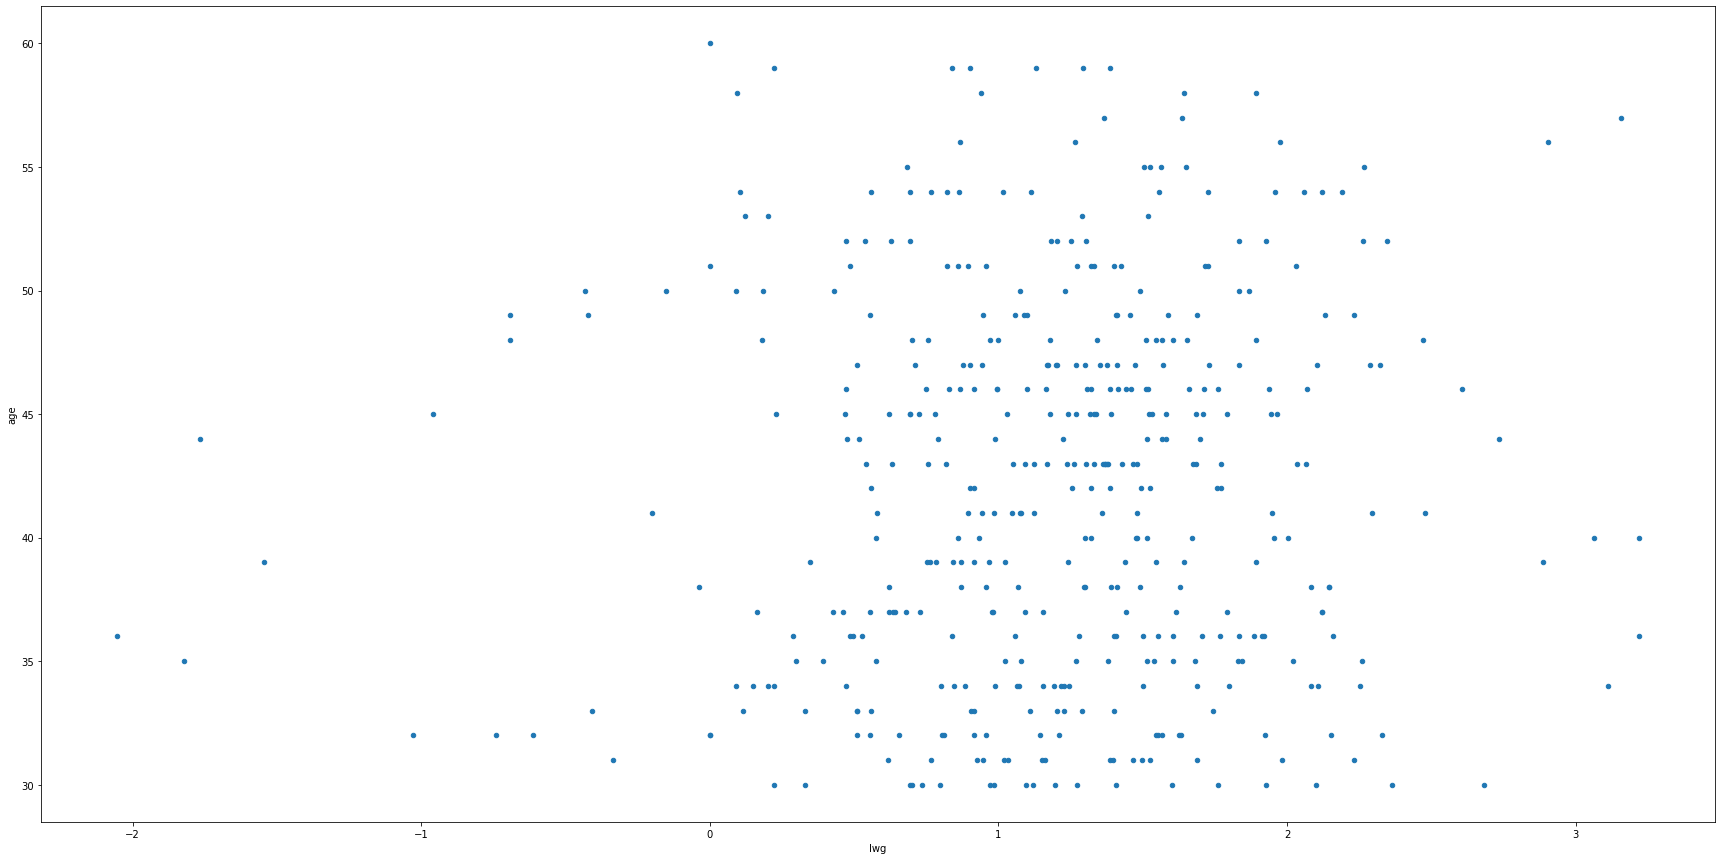

In [3]:
data.plot.scatter('lwg', 'age');

## B:

In [4]:
data['wage'] = np.exp(data['lwg'])
data

,k5,k618,age,lwg,inc,lfp,wc,hc,wage
0,1,0,32,1.210165,10.910001,In labor force,Wife did not attend college,0,3.354037
1,0,2,30,0.328504,19.500000,In labor force,Wife did not attend college,0,1.388889
2,1,3,35,1.514128,12.039999,In labor force,Wife did not attend college,0,4.545455
3,0,3,34,0.092115,6.800000,In labor force,Wife did not attend college,0,1.096491
4,1,2,31,1.524280,20.100000,In labor force,Wife attended college,0,4.591837
...,...,...,...,...,...,...,...,...,...
423,0,5,36,0.838011,18.200001,In labor force,Wife did not attend college,0,2.311765
424,0,1,40,1.668861,22.641001,In labor force,Wife did not attend college,0,5.306122
425,0,2,43,1.769435,21.640001,In labor force,Wife attended college,0,5.867537
426,0,1,33,1.226446,24.000000,In labor force,Wife did not attend college,0,3.409091


In [5]:
data['children'] = data['k5'] + data['k618']
has_children_mean = data[data.children > 0]['wage'].mean()
no_children_mean = data[data.children == 0]['wage'].mean()
print(has_children_mean)
print(no_children_mean)

4.061710834503174
4.426661968231201


## C:

In [6]:
data['inc_discrete'] = pd.cut(data['inc'], 5, labels = [1,2,3,4,5])
data['inc_discrete'].value_counts()

1    247
2    156
3     21
4      2
5      2
Name: inc_discrete, dtype: int64

In [7]:
ax = {}

for i in range(1,6):
    ax[i] = data[data['inc_discrete'] == i]['wage'].mean()

ax

{1: 3.686603307723999,
 2: 4.854166507720947,
 3: 4.784061431884766,
 4: 4.528778553009033,
 5: 5.340986251831055}

## D:

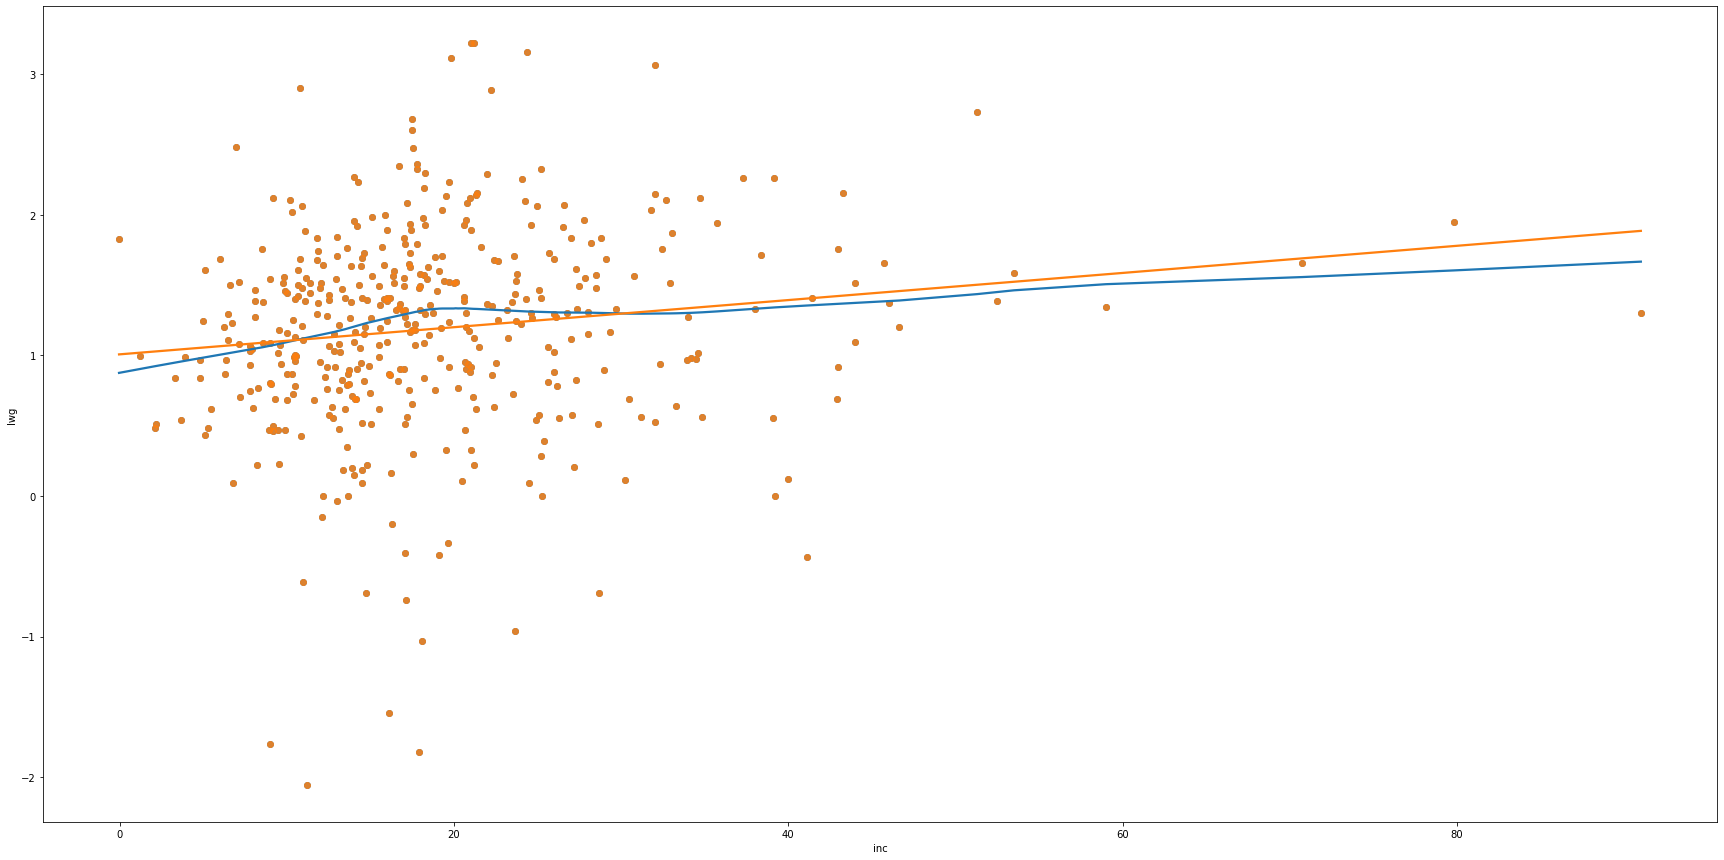

In [11]:
sns.regplot(x = 'inc', y = 'lwg', data = data, lowess = True);
sns.regplot(x = 'inc', y = 'lwg', data = data, ci = None);

## E:

In [12]:
m1 = sm.ols(formula = 'lwg ~ linc', data = data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lwg   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.65
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           0.000703
Time:                        15:02:37   Log-Likelihood:                -461.34
No. Observations:                 427   AIC:                             926.7
Df Residuals:                     425   BIC:                             934.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5690      0.185      3.079      0.002       0.206       0.932
linc           0.2207      0.065      3.413      0.001       0.094       0.348
==============================================================================
Omnibus:                       65.243   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.890
Skew:                          -0.761   Prob(JB):                     2.58e-36
Kurtosis:                       5.626   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
m2 = sm.ols(formula = 'lwg ~ linc + wc + k5', data = data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lwg   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     10.67
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           8.92e-07
Time:                        15:02:38   Log-Likelihood:                -451.54
No. Observations:                 427   AIC:                             911.1
Df Residuals:                     423   BIC:                             927.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7065      0.184      3.833      0.000       0.344       1.069
wc[T.Wife attended college]     0.3353      0.075      4.450      0.000       0.187       0.483
linc                            0.1351      0.066      2.041      0.042       0.005       0.265
k5                             -0.0675      0.087     -0.775      0.439      -0.239       0.104
==============================================================================
Omnibus:                       82.950   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.726
Skew:                          -0.889   Prob(JB):                     8.02e-56
Kurtosis:                       6.332   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""